<a href="https://colab.research.google.com/github/realBagher/fundemental_Ai_algorithms/blob/main/evolutionary_strategy/Evolutionary_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Impelemention of evolutionary Strategy algorithm 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as ss
import math
from tqdm import tqdm 
import copy

## Genome Class 
> in the class below the we have defined all the functions that are needed in including :


*   intialization method : randomly creates the initial value for each feature of the genome in the given range  [-100,100] 
*   to_string method : simply prints out the genome details
* evalue method : calculates the measurment mapped to the fitness of the genome 
<br> 
**please note that we solve for the minimum value here thus the lesser is the given number by the *evaluate* function the higher is the actual fitness of the genome**
* constraint check method : checks each feature of genome to see if its in valid range of [-100 , 100] or not 
* mutate method : using the **np.random.randn** and sigma an mu of the mutation vairable we add a small amount to each feature to generate the next generations individual  



In [ ]:
class genome:
  def __init__(self,length):
    self.genes = []
    self.size = length
    self.fitness = 0
    
  def initialize(self):
    self.genes = list(np.random.randint(-100,100,self.size))

  def to_string(self):
    temp = pd.Series(self.genes)
    print("\n** GENOME EVALUATION **")
    print('-> fitness: ',self.evaluate())
    print('-> GENOME DETAILS')
    print(temp)

  def evaluate(self):
    fitness = np.sum(np.power(self.genes,2))
    self.fitness = fitness
    return fitness

  def constraint_check(self):
    for i in range(self.size):
      if self.genes[i] < -100 or self.genes[i] > 100:
        return False 
    return True

  def constraint_check2(self,genes):
    for i in range(len(genes)):
      if genes[i] < -100 or genes[i] > 100:
        return False 
    return True

  def mutate(self,sigma,mu):
    temp = self.genes.copy()
    for i in range(len(temp)):
     temp[i] += sigma * np.random.randn() + mu 
    if self.constraint_check2(temp):
      self.genes = temp
      return 1
    else:
      return 0







## replacement function 
> check the fitness of the both parent and child and return the one closer to the minimum

In [ ]:
def replacement(genome_parent,genome_child):
  if genome_parent.evaluate() < genome_child.evaluate():
    return genome_parent
  else:
    return genome_child


## mutute function 
> copies the genome signature genes and add a small amount based on the normal distributions which is controlled using sigma and mu of the mutation 
<br>
after checking the validation of genome signature it will return either the new genome sequence or the original parents sequence 

In [ ]:
def mutate(genome,sigma,mu,sucess):
    temp = genome.genes.copy()
    for i in range(temp):
      print(i)
      temp[i] -= sigma * np.random.randn() + mu
    for i in range(temp):
      if temp[i] < -100 or temp[i] > 100:
        # print('unsucessful mutation')
        sucess[0] +=1 
        return genome
      else:
        # print('sucessful mutation')
        sucess[1] +=1 
        genome.genes = temp
        return genome 

    

test of the said functions 

In [ ]:
child = genome(5)
child.initialize()
child.to_string()
child.constraint_check()
child.evaluate()
child.mutate(1,1)


** GENOME EVALUATION **
-> fitness:  25709
-> GENOME DETAILS
0   -88
1    -8
2    96
3    78
4    51
dtype: int64


1

## Implementation of the first ES algorithm
the code is self-explanatory 

In [ ]:
FITNESS = []
def es(genome_length,termination):
  parent = genome(genome_length)
  parent.initialize()
  print('initial gen:')
  parent.to_string()
  for i in tqdm(range(termination)):
    child = genome(genome_length)
    child.genes = parent.genes
    child.mutate(10,1)
    parent = replacement(parent,child)
    FITNESS.append(parent.evaluate())
  return parent.to_string()
     

    



In [ ]:
es(10,1000)

initial gen:

** GENOME EVALUATION **
-> fitness:  26081
-> GENOME DETAILS
0   -91
1   -53
2    64
3     6
4    50
5    33
6   -46
7    37
8    44
9    43
dtype: int64


100%|██████████| 1000/1000 [00:00<00:00, 20485.80it/s]


** GENOME EVALUATION **
-> fitness:  128.20600989664973
-> GENOME DETAILS
0   -3.867773
1    0.642587
2   -0.372250
3    1.804134
4    5.317765
5    2.814875
6    5.694046
7    5.844040
8    0.635585
9   -2.501774
dtype: float64


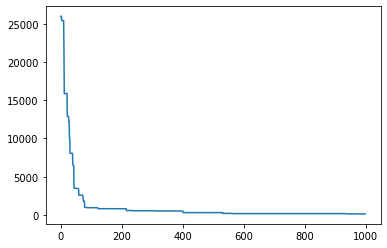

In [ ]:
plt.plot(FITNESS)

## Impelementation of ES algorithm with 1/5 rule 
the sigma parameter of the mutation is set by the 1/5 th rule 

In [ ]:
FITNESS = []
SIGMA_VALUE = []
S_VALUE = []
def es(gene_size,termination,iterations=10):
  parent_genome = genome(gene_size)
  parent_genome.initialize()
  print('initial gen:')
  parent_genome.to_string()
  #initial sigma is set on -10
  sigma = -10
  success=0
  denom = 0.85
  for epoch in range(termination):
    child_genome = genome(gene_size)
    child_genome.genes = parent_genome.genes
    #after k-iterations check and tune sigma based on successful mutations actual 1/5th rule implementation 
    if(epoch%iterations==0):
      succuess_rate=success/iterations
      # print('------------->>',success," || rate",succuess_rate)
      if(succuess_rate>0.2):
        sigma=sigma/denom
        # print('1: sigma changed to ',sigma)
      elif succuess_rate<0.2:
        sigma=sigma*denom
        # print('2: sigma changed to ',sigma)
      SIGMA_VALUE.append(sigma)
      
        
    # calculation the success 
    status = child_genome.mutate(sigma,1)
    if status :
      if child_genome.evaluate() < parent_genome.evaluate():
        parent_genome = child_genome
        success += 1
        S_VALUE.append(success)
        FITNESS.append(parent_genome.evaluate())


    
  # print the result
  print('final gen')
  parent_genome.to_string()

In [ ]:
es(10,1000)

initial gen:

** GENOME EVALUATION **
-> fitness:  29629
-> GENOME DETAILS
0    52
1    50
2   -92
3   -18
4    -5
5    45
6   -79
7    15
8   -64
9   -55
dtype: int64
final gen

** GENOME EVALUATION **
-> fitness:  1197.7592335052984
-> GENOME DETAILS
0    24.932651
1     3.484512
2     6.590989
3    -5.740935
4    -3.051261
5     6.485085
6    -1.691082
7    -7.475113
8    14.192673
9    13.268207
dtype: float64


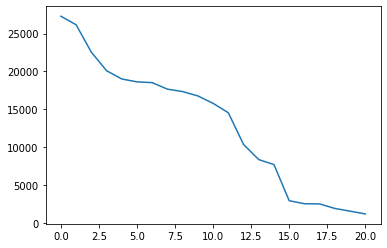

In [ ]:
plt.plot(FITNESS)

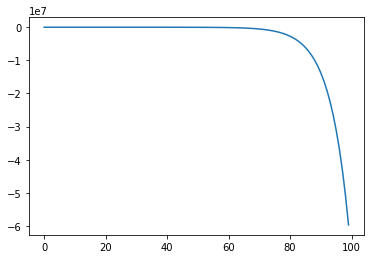

In [ ]:
plt.plot(SIGMA_VALUE)

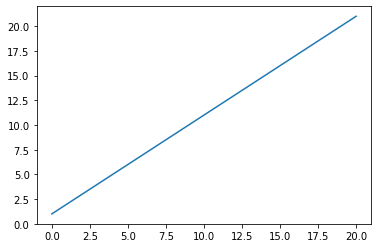

In [ ]:
plt.plot(S_VALUE)

## Impelementation of ES algorithm based on mu =4 and lambda = 2

In [ ]:
FITNESS = []
def es(gene_length,termination,mu,lambdaa,replacement_type):
  parents=[]
  childs=[]
  for i in range(mu):
    parent = genome(gene_length)
    parent.initialize()
    parents.append(parent)
  print('initial gen:')
  for i in range(len(parents)):
    parents[i].to_string()
    
  for i in tqdm(range(termination)):
    fitness = [parent.evaluate() for parent in parents]
    FITNESS.append(fitness)
    prob = [ eval/np.sum(fitness) for eval in fitness]
    childs=[]
    for i in range(lambdaa):
      childs.append(np.random.choice(parents,p=prob))

      for child in childs:
        child.mutate(-1000,1)
           
      if replacement_type==",":
         
         childs.sort(key= lambda child : child.evaluate())
         parents=[]
         for i in range(0,mu):
          parents.append(childs[i])

      elif replacement_type=="+":
        mating_pool = [*parents,*childs]
        mating_pool.sort(key= lambda x : child.evaluate())
        parents=[]
        for i in range(0,mu):
          fitness = mating_pool[i].evaluate()
          FITNESS.append(fitness)
          parents.append(mating_pool[i])




  parents.sort(key = lambda parent : parent.evaluate())
  print('->final gen:')
  for i in range(len(parents)):
    parents[i].to_string()

In [ ]:
es(10,1000,4,2,'+')

initial gen:

** GENOME EVALUATION **
-> fitness:  35501
-> GENOME DETAILS
0    49
1    92
2     6
3   -61
4    -4
5   -80
6    45
7   -35
8    67
9   -82
dtype: int64

** GENOME EVALUATION **
-> fitness:  49810
-> GENOME DETAILS
0   -87
1   -30
2    90
3   -53
4    11
5    76
6   -62
7    81
8   -81
9   -87
dtype: int64

** GENOME EVALUATION **
-> fitness:  46370
-> GENOME DETAILS
0    91
1    26
2   -91
3    92
4    67
5   -33
6   -57
7    71
8    52
9   -64
dtype: int64

** GENOME EVALUATION **
-> fitness:  41865
-> GENOME DETAILS
0     9
1    43
2     1
3    93
4   -95
5    79
6    75
7   -63
8    44
9   -67
dtype: int64


100%|██████████| 1000/1000 [00:00<00:00, 2072.77it/s]

->final gen:

** GENOME EVALUATION **
-> fitness:  35501
-> GENOME DETAILS
0    49
1    92
2     6
3   -61
4    -4
5   -80
6    45
7   -35
8    67
9   -82
dtype: int64

** GENOME EVALUATION **
-> fitness:  41865
-> GENOME DETAILS
0     9
1    43
2     1
3    93
4   -95
5    79
6    75
7   -63
8    44
9   -67
dtype: int64

** GENOME EVALUATION **
-> fitness:  46370
-> GENOME DETAILS
0    91
1    26
2   -91
3    92
4    67
5   -33
6   -57
7    71
8    52
9   -64
dtype: int64

** GENOME EVALUATION **
-> fitness:  49810
-> GENOME DETAILS
0   -87
1   -30
2    90
3   -53
4    11
5    76
6   -62
7    81
8   -81
9   -87
dtype: int64
